## How many rows and columns are in the dataset?

In [43]:
import pandas as pd

# Load the dataset
df_0 = pd.read_csv('data/cleaned/appended_data.csv')

# Question 1: How many rows and columns are in the dataset?
print("Number of observations (rows):", df_0.shape[0])
print("Number of features (columns):", df_0.shape[1])


Number of observations (rows): 11076
Number of features (columns): 45


## What is the proportion of missing values per column?

In [44]:
# Question 2: What is the proportion of missing values per column?
#print("Proportion of missing values per column:\n", df.isnull().mean())

# The proportion of missing values per column in descending order
#print("Proportion of missing values per column (desc):\n",df.isnull().mean().sort_values(ascending=False))

# How many columns have a proportion of missing values over 60%?
print("Number of columns with a proportion of missing values over 60%:", (df_0.isnull().mean() > 0.6).sum())

# Display column names with proportion of missing values over 50% and the proportion of missing values in descending order
print("Columns with proportion of missing values over 60% and their proportion of missing values (desc):\n", df_0.isnull().mean()[df_0.isnull().mean() > 0.6].sort_values(ascending=False))


Number of columns with a proportion of missing values over 60%: 11
Columns with proportion of missing values over 60% and their proportion of missing values (desc):
 Parking box count        1.000000
Sea view                 0.998917
Is Holiday Property      0.986367
Terrace Orientation      0.976074
Garden Orientation       0.917570
Sewer                    0.855092
Gas Water Electricity    0.800108
Kitchen Surface          0.740610
Parking count inside     0.685175
Land Surface             0.680029
Parking count outside    0.672896
dtype: float64


## Identify & remove (drop) all columns with more than 60% missing values from our data set

In [45]:
# Identify columns with more than 60% missing values
columns_to_drop = df_0.columns[df_0.isnull().mean() > 0.6]

# Drop columns with over 60% missing values from the DataFrame and create a copy of the DataFrame with the remaining columns
df_1 = df_0.drop(columns=columns_to_drop).copy()

# Save the cleaned DataFrame to a new CSV file
df_1.to_csv('data/cleaned/cleaned_missing_vals.csv', index=False)

# Optionally, print out the shape of the new DataFrame to confirm the changes
print("Shape of DataFrame after removing columns with >60% missing values:", df_1.shape)


Shape of DataFrame after removing columns with >60% missing values: (11076, 34)


## Are therey any duplicates?

In [46]:
# Check for duplicates
print(df_1.duplicated().sum())

# Display the column names and their data types
# print(df.dtypes)

# Display the first few rows of the dataframe
# print(df.head())

0


## Price distribution per region for all properties in our dataset

### Import all necessary plotting libraries 

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Price distribution per region
### Plot type: boxplot

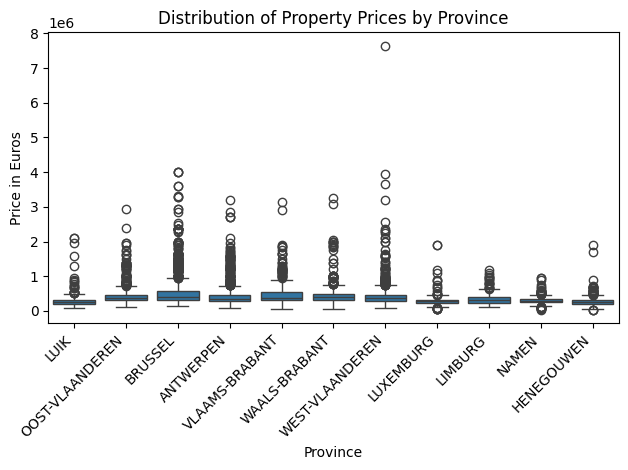

In [48]:

# Ensure that 'Price' is in numeric format
df_1['Price'] = pd.to_numeric(df_1['Price'], errors='coerce')

# Create a box plot
sns.boxplot(x='Province', y='Price', data=df_1)

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Province')
plt.ylabel('Price in Euros')
plt.title('Distribution of Property Prices by Province')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

## Price distribution per region
### Plot type: violin plot

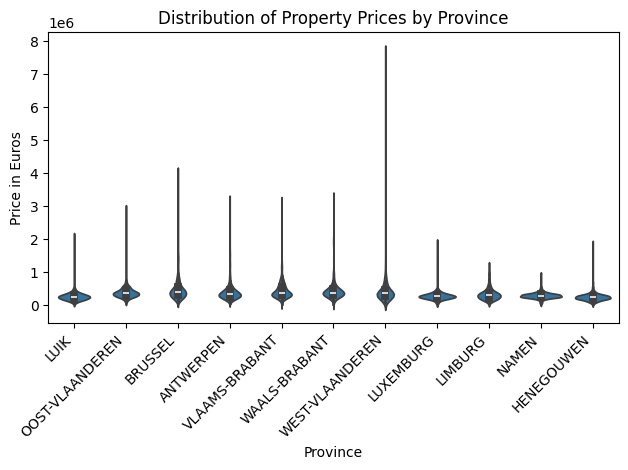

In [50]:
# Create a violin plot
sns.violinplot(x='Province', y='Price', data=df_1)

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Province')
plt.ylabel('Price in Euros')
plt.title('Distribution of Property Prices by Province')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

### Thoughts:
- there are many prices in our data set that are way out of the interquartile range. 
- there are too many provinces, we only want the main 3
- the scientific notation for the price is not very helpful
### Suggested actions:
- sub-set the data set to only include properties with a price of less than 1,000,000
- merge the provinces into the main 3


## Format the X-axis label from scientific notation to million EUR units

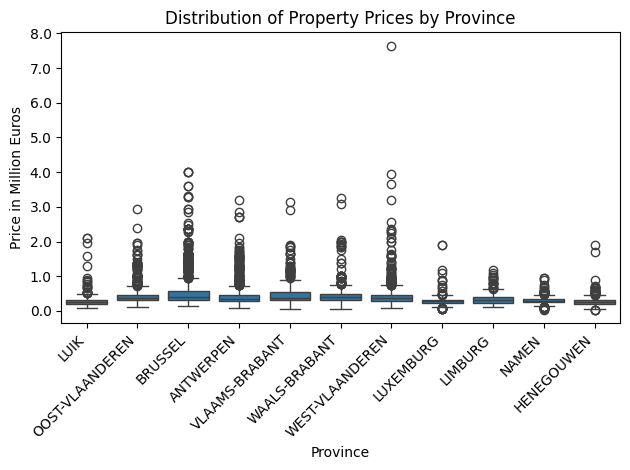

In [51]:
# Ensure that 'Price' is in numeric format
df_1['Price'] = pd.to_numeric(df_1['Price'], errors='coerce')

# Create a box plot or violin plot
sns.boxplot(x='Province', y='Price', data=df_1)  # For box plot
# sns.violinplot(x='Province', y='Price', data=df)  # For violin plot, uncomment this line and comment the box plot line above if you prefer a violin plot

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Province')
plt.ylabel('Price in Million Euros')
plt.title('Distribution of Property Prices by Province')

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

## There is one outlier data point in the price column. Identify and remove it

In [52]:
# Ensure that 'Price' is in numeric format
df_1['Price'] = pd.to_numeric(df_1['Price'], errors='coerce')

# BAD WAY of creating a new df apparently, kept hitting a warning message:
# df_2 = df_1[df_1['Price'] < 7000000]

#This is the GOOD WAY to create a new df with a subset of the original df, by using the .copy() method
df_2 = df_1[df_1['Price'] <= 7000000].copy()

# Print the number of rows and columns in the new DataFrame
print("Number of observations (rows) with villa:", df_1.shape[0])
print("Number of observations (rows) without villa:", df_2.shape[0])
print("Number of columns in newest df:", df_2.shape[1])


Number of observations (rows) with villa: 11076
Number of observations (rows) without villa: 11075
Number of columns in newest df: 34


## The outlier is a holiday villa at the seaside.
#### We will remove it from further analysis since it is a unique property and not representative of our small dataset.

## Re-plot the price distribution per region for all properties in our dataset, without the outlier villa

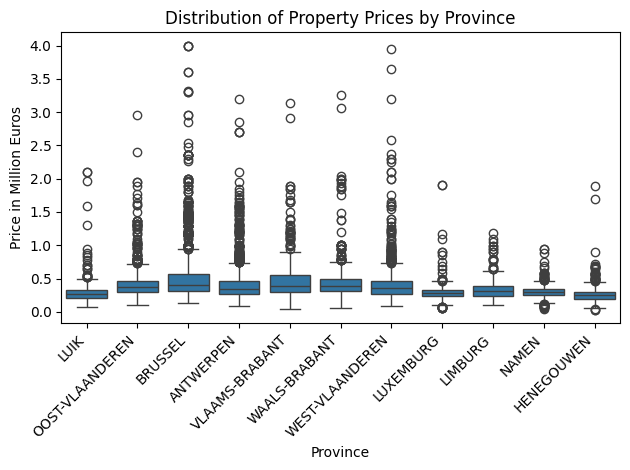

In [53]:
# Create a box plot (or violin plot, commented)
sns.boxplot(x='Province', y='Price', data=df_2)  # For box plot
# sns.violinplot(x='Province', y='Price', data=df)  # For violin plot, uncomment this line and comment the box plot line above if you prefer a violin plot

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Province')
plt.ylabel('Price in Million Euros')
plt.title('Distribution of Property Prices by Province')

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

## Create a new feature: REGION
### The function takes the values in the existing Province column and groups them to create a new column REGION that only has the three main regions in Belgium: Flanders, Wallonia and Brussels

In [54]:
# Function to determine the region based on the province
def province_to_region(province):
    if province in ['LUIK', 'LIMBURG', 'WAALS-BRABANT', 'LUXEMBURG', 'NAMEN', 'HENEGOUWEN']:
        return 'Wallonia'
    elif province == 'BRUSSEL':
        return 'Brussels'
    elif province in ['OOST-VLAANDEREN', 'ANTWERPEN', 'VLAAMS-BRABANT', 'WEST-VLAANDEREN']:
        return 'Flanders'
    else:
        return 'Unknown'  # For any province value not listed above

# Apply the function to the 'Province' column to create the new 'Region' column
df_2['Region'] = df_2['Province'].apply(province_to_region)

## Verify that the new column is correctly created

In [55]:
print(df_2['Region'].unique()) # Display unique values in the 'Region' column
print(df_2['Region'].value_counts()) # Display the count of each unique value in the 'Region' column
print(df_2.sample(3)) # Display a random sample of 5 rows from the DataFrame

['Wallonia' 'Flanders' 'Brussels']
Region
Flanders    5617
Wallonia    3340
Brussels    2118
Name: count, dtype: int64
             ID         Locality  Postal Code  Build Year  Facades  \
6080   10805000  Strombeek-Bever         1853      2022.0      4.0   
5465   10965140          Ixelles         1050      2024.0      2.0   
10275  11166996     ORP-LE-GRAND         1350         NaN      NaN   

       Habitable Surface       Type      Subtype   Price    Sale Type  ...  \
6080               104.0  APARTMENT    APARTMENT  320250  NORMAL_SALE  ...   
5465                47.0  APARTMENT  FLAT_STUDIO  360000  NORMAL_SALE  ...   
10275              121.0  APARTMENT    PENTHOUSE  399250  NORMAL_SALE  ...   

       Living Surface  EPC  Consumption Per m2  Cadastral Income  \
6080             41.0  NaN                 NaN                 0   
5465              NaN    C                96.0                 0   
10275             NaN  NaN                 NaN                 0   

       Has sta

## Check for unknown values in the new column 
### P.S. There was an initial error that returned unknowns, now fixed.

In [56]:
unknown_regions = df_2[df_2['Region'] == 'Unknown']
print(f"Number of 'Unknown' regions: {len(unknown_regions)}")
if not unknown_regions.empty:
    print("Sample of 'Unknown' regions:")
    print(unknown_regions.sample(min(5, len(unknown_regions))))  # Show up to 5 samples

Number of 'Unknown' regions: 0


## Distribution of prices per main region in Belgium

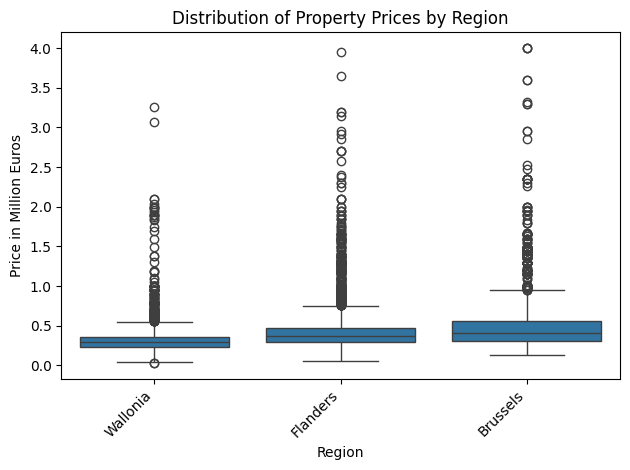

In [57]:
# Create a box plot
sns.boxplot(x='Region', y='Price', data=df_2)  # For box plot
# sns.violinplot(x='Province', y='Price', data=df)  # For violin plot, uncomment this line and comment the box plot line above if you prefer a violin plot

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Region')
plt.ylabel('Price in Million Euros')
plt.title('Distribution of Property Prices by Region')

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

## Subset our data set into two groups: apartments and houses

### First check how many unique values there are in the type column

In [58]:
# Display all unique values in the 'Type' column
unique_types = df_2['Type'].unique()
print("Unique values in 'Type' column:", unique_types)

# Get the count of unique values in the 'Type' column
unique_type_count = df_2['Type'].nunique()
print("Number of unique values in 'Type' column:", unique_type_count)


Unique values in 'Type' column: ['APARTMENT' 'HOUSE' 'OFFICE' 'COMMERCIAL' 'LAND' 'GARAGE']
Number of unique values in 'Type' column: 6


### Now remove all rows that are of type different than apartment or house

In [59]:
print(df_2['Type'].unique()) # Display unique values in the 'Type' column
print(df_2['Type'].value_counts()) # Display the count of each unique value in the 'Type' column

# Make a copy of the df where we only keep rows where 'Type' is 'HOUSE' or 'APARTMENT'
df_3 = df_2[df_2['Type'].isin(['HOUSE', 'APARTMENT'])].copy()
print(df_3['Type'].unique()) # Display unique values in the 'Type' column

count = len(df_2[df_2['Type'].isin(['HOUSE', 'APARTMENT'])])
print(f"Total number of rows with 'HOUSE' or 'APARTMENT' in the 'Type' column: {count}")

print(df_3['Type'].unique()) # Display unique values in the 'Type' column
print(df_3['Type'].value_counts())


import os

# Create the directory if it does not exist
os.makedirs('data/cleaned', exist_ok=True)

# Now save the new DataFrame to a csv that only contains observations for houses and apartments
df_3.to_csv('data/cleaned/cleaned_extratypes.csv', index=False)


['APARTMENT' 'HOUSE' 'OFFICE' 'COMMERCIAL' 'LAND' 'GARAGE']
Type
APARTMENT     7531
HOUSE         3442
LAND            53
COMMERCIAL      31
OFFICE          17
GARAGE           1
Name: count, dtype: int64
['APARTMENT' 'HOUSE']
Total number of rows with 'HOUSE' or 'APARTMENT' in the 'Type' column: 10973
['APARTMENT' 'HOUSE']
Type
APARTMENT    7531
HOUSE        3442
Name: count, dtype: int64


## Create two separate data frames, one for houses, one for apartments

In [60]:
# Create a DataFrame for houses
df_houses = df_3[df_3['Type'] == 'HOUSE'].copy()

# Create a DataFrame for apartments
df_apartments = df_3[df_3['Type'] == 'APARTMENT'].copy()

## Distribution of prices per main region in Belgium, separated for houses and apartments

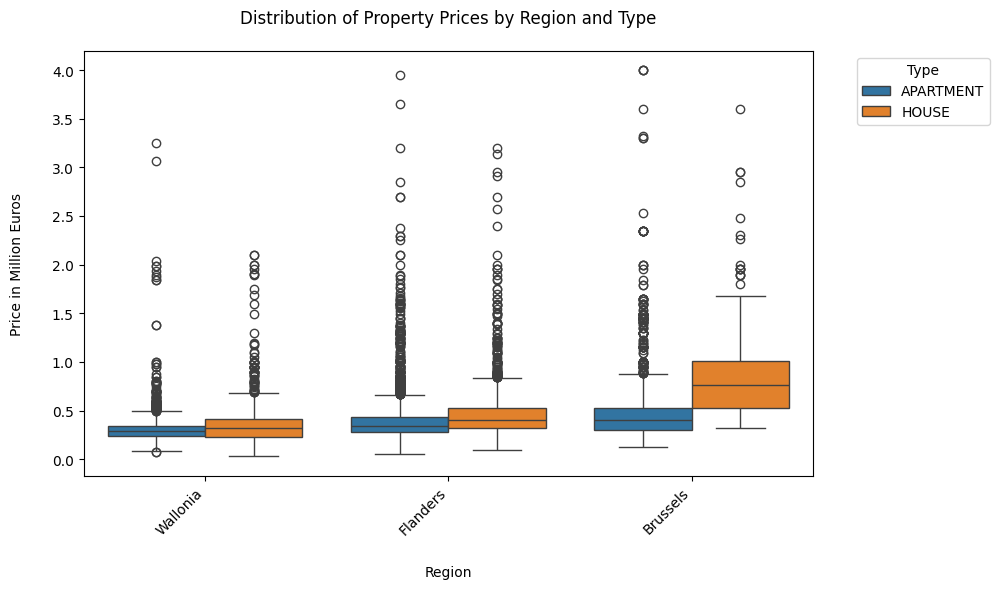

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the figure size to make the plot wider
plt.figure(figsize=(12, 6))  # Increase the width as needed

# Ensure that 'Price' is in numeric format
df_3['Price'] = pd.to_numeric(df_3['Price'], errors='coerce')

# Create a box plot with 'Region' on the x-axis, 'Price' on the y-axis, and 'Type' as the hue
sns.boxplot(x='Region', y='Price', hue='Type', data=df_3)

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')


# Set the labels and title
plt.xlabel('Region', labelpad=20)
plt.ylabel('Price in Million Euros', labelpad=20)
plt.title('Distribution of Property Prices by Region and Type', pad=20)

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Move the legend outside the plot
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot with adjusted layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect parameter as needed to fit your plot and legend
plt.show()

## Price segmentation for houses and apartments in Belgium (binned prices)

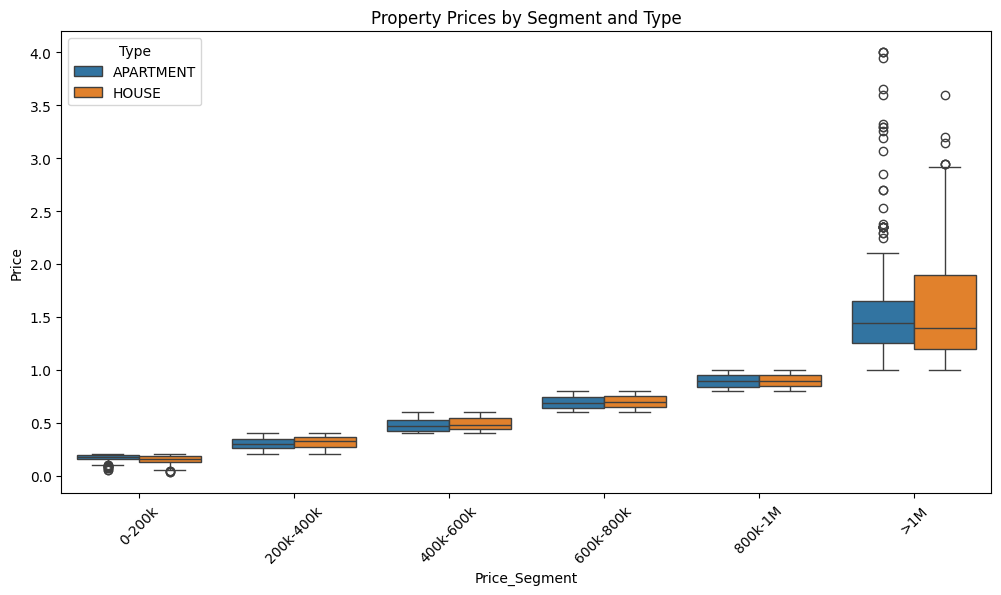

In [62]:
# Define the edges of our bins - we can update these as needed
bins = [0, 200000, 400000, 600000, 800000, 1000000, float('inf')]

# Define the labels for the bins
labels = ['0-200k', '200k-400k', '400k-600k', '600k-800k', '800k-1M', '>1M']

# Ensure that 'Price' is in numeric format
df_3['Price'] = pd.to_numeric(df_3['Price'], errors='coerce')

# Create a new column 'Price_Segment' using pd.cut
df_3['Price_Segment'] = pd.cut(df_3['Price'], bins=bins, labels=labels, right=False)

# Plot the distribution:
plt.figure(figsize=(12, 6))

sns.boxplot(x='Price_Segment', y='Price', hue='Type', data=df_3)
plt.xticks(rotation=45)
plt.title('Property Prices by Segment and Type')

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

plt.show()

## Price segmentation 

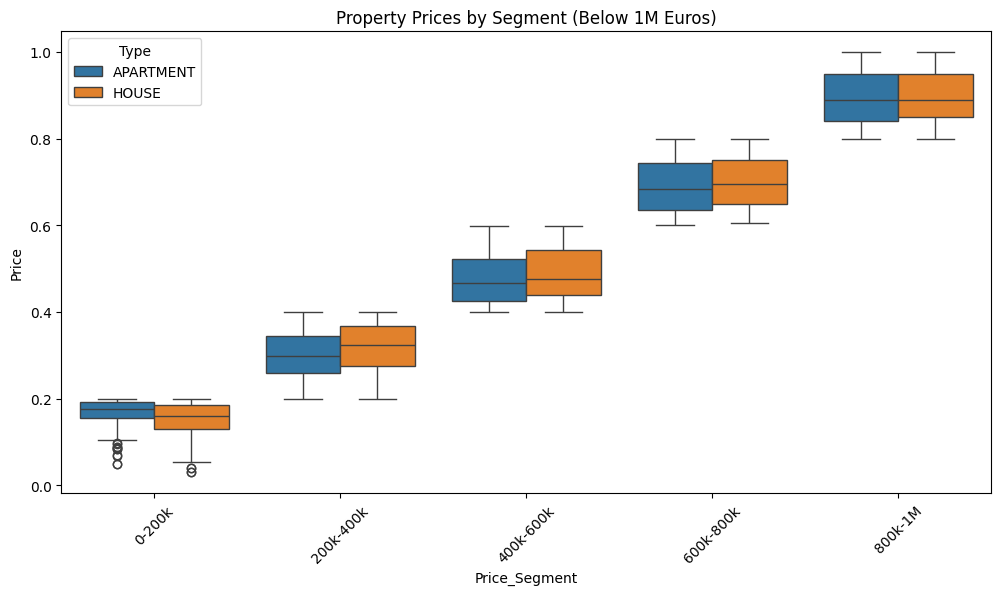

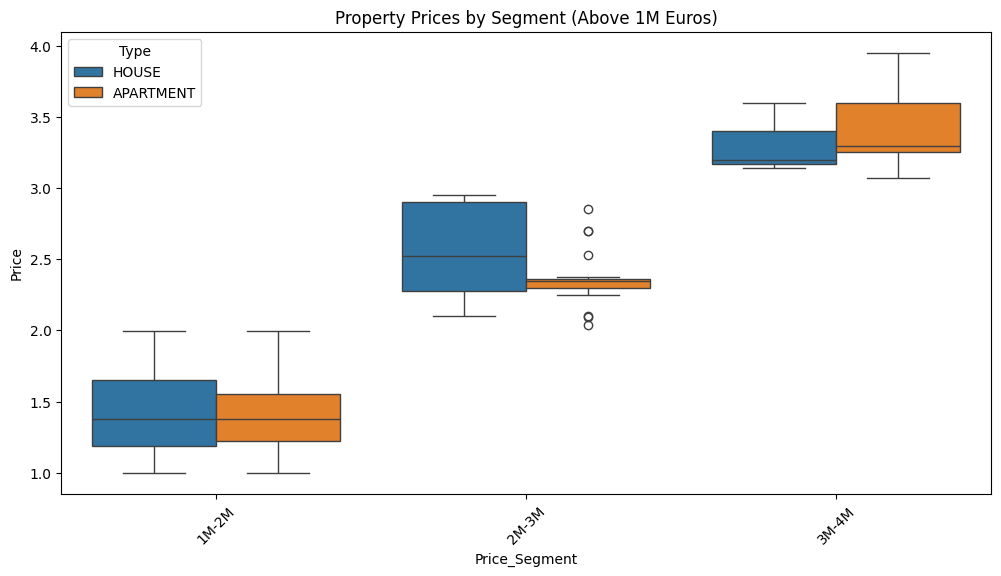

In [63]:
# Bins and labels for properties below 1 million Euros
bins_below_1m = [0, 200000, 400000, 600000, 800000, 1000000]
labels_below_1m = ['0-200k', '200k-400k', '400k-600k', '600k-800k', '800k-1M']

# Bins and labels for properties above 1 million Euros
max_price = df_3['Price'].max()
bins_above_1m = list(range(1000000, int(max_price) + 1000000, 1000000))
labels_above_1m = [f'{i//1000000}M-{(i+1000000)//1000000}M' for i in bins_above_1m[:-1]]

# Ensure that 'Price' is in numeric format
df_3['Price'] = pd.to_numeric(df_3['Price'], errors='coerce')


# Separate the DataFrame into two based on price (use .copy() methd to avoid the SettingWithCopyWarning)
df_below_1m = df_3[df_3['Price'] < 1000000].copy()
df_above_1m = df_3[df_3['Price'] >= 1000000].copy()

# Create the 'Price_Segment' column for each DataFrame
df_below_1m['Price_Segment'] = pd.cut(df_below_1m['Price'], bins=bins_below_1m, labels=labels_below_1m, right=False)
df_above_1m['Price_Segment'] = pd.cut(df_above_1m['Price'], bins=bins_above_1m, labels=labels_above_1m, right=False)

# Plot for properties below 1 million Euros
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price_Segment', y='Price', hue='Type', data=df_below_1m)
plt.xticks(rotation=45)
plt.title('Property Prices by Segment (Below 1M Euros)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))
plt.show()

# Plot for properties above 1 million Euros
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price_Segment', y='Price', hue='Type', data=df_above_1m)
plt.xticks(rotation=45)
plt.title('Property Prices by Segment (Above 1M Euros)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))
plt.show()

## Proportion of properties by price segment (overall)

/var/folders/5h/_vtcyyv117xbrdwp8624nv_c0000gp/T/ipykernel_88033/2985540616.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=price_segment_proportions.index, y=price_segment_proportions.values, palette="Blues_d")


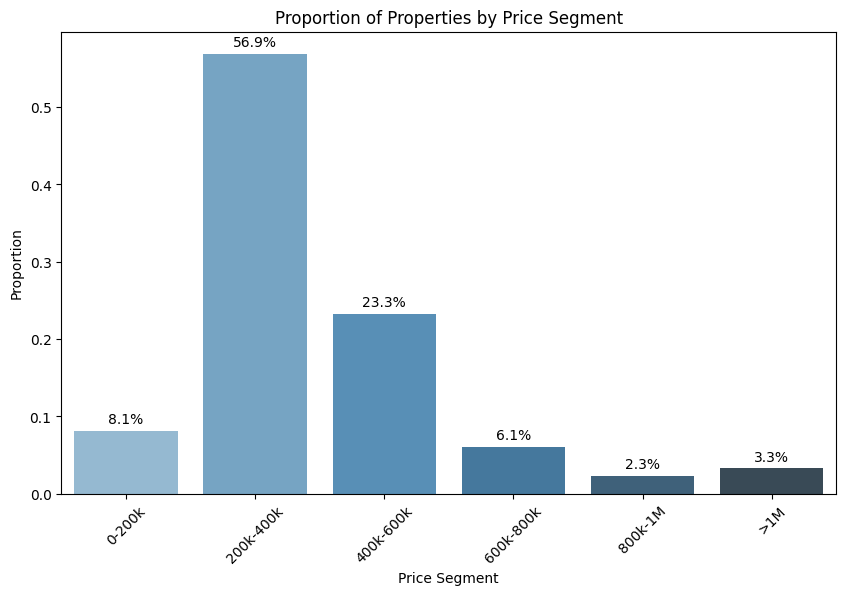

In [85]:
# Ensure that 'Price' is in numeric format
df_3['Price'] = pd.to_numeric(df_3['Price'], errors='coerce')

# Define bins and labels for all properties
bins = [0, 200000, 400000, 600000, 800000, 1000000, float('inf')]
labels = ['0-200k', '200k-400k', '400k-600k', '600k-800k', '800k-1M', '>1M']

# Create 'Price_Segment' for all properties
df_3['Price_Segment'] = pd.cut(df_3['Price'], bins=bins, labels=labels, right=False)

# Calculate the proportion of each price segment
price_segment_proportions = df_3['Price_Segment'].value_counts(normalize=True).sort_index()

# Plot the proportions
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=price_segment_proportions.index, y=price_segment_proportions.values, palette="Blues_d")

plt.title('Proportion of Properties by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Proportion')
plt.xticks(rotation=45)  # Rotate labels to improve readability

# Annotate each bar with the percentage value
for bar in bars.patches:
    # The text annotation for each bar should be its height (proportion) formatted as a percentage
    bars.annotate(format(bar.get_height(), '.1%'),  # Format the proportion as a percentage with one decimal place
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position for the text (x, y)
                   ha='center',  # Center the text horizontally
                   va='center',  # Center the text vertically within the bar
                   size=10,  # Font size
                   xytext=(0, 8),  # Position offset for the text (to be slightly above the bar)
                   textcoords='offset points')  # Use offset points for positioning the text

plt.show()

## Proportion of property types by price segment

/var/folders/5h/_vtcyyv117xbrdwp8624nv_c0000gp/T/ipykernel_88033/1409677684.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_type_counts = df_3.groupby(['Price_Segment', 'Type']).size().reset_index(name='counts')


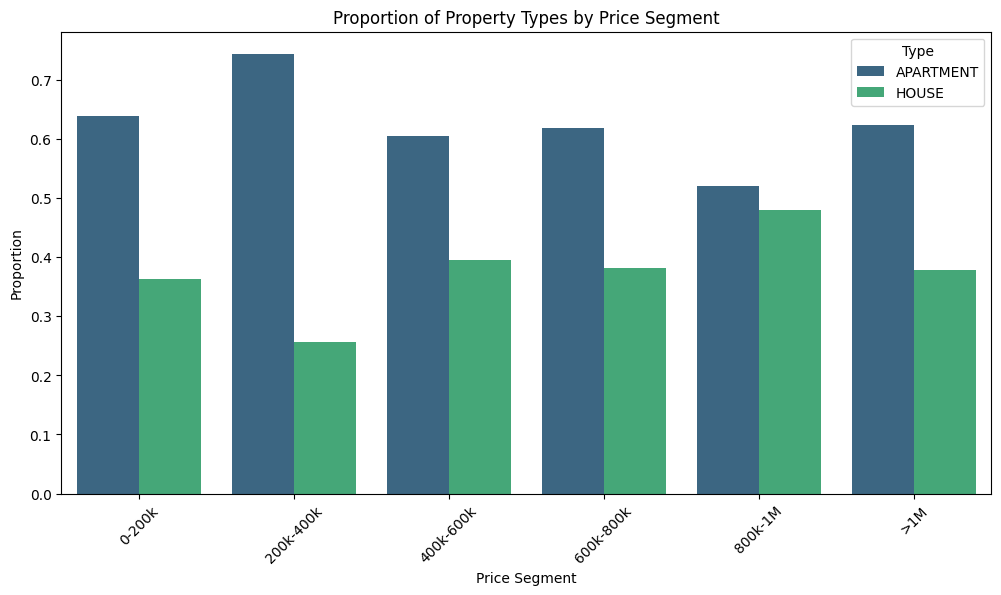

In [86]:
# Calculate the count of each combination of 'Price_Segment' and 'Type'
segment_type_counts = df_3.groupby(['Price_Segment', 'Type']).size().reset_index(name='counts')

# Calculate the total count of properties in each 'Price_Segment'
segment_counts = df_3['Price_Segment'].value_counts().reset_index()
segment_counts.columns = ['Price_Segment', 'total_counts']

# Merge to get total counts in each segment for normalization
segment_type_counts = pd.merge(segment_type_counts, segment_counts, on='Price_Segment')

# Calculate the proportion of each type within each price segment
segment_type_counts['proportion'] = segment_type_counts['counts'] / segment_type_counts['total_counts']

# Now plot using sns.barplot with the 'hue' parameter
plt.figure(figsize=(12, 6))
sns.barplot(data=segment_type_counts, x='Price_Segment', y='proportion', hue='Type', palette='viridis')

plt.title('Proportion of Property Types by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

plt.show()

## Proportion of properties by price segment < 1M EUR

/var/folders/5h/_vtcyyv117xbrdwp8624nv_c0000gp/T/ipykernel_88033/3373175568.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=price_segment_proportions.index, y=price_segment_proportions.values, palette="Blues_d")


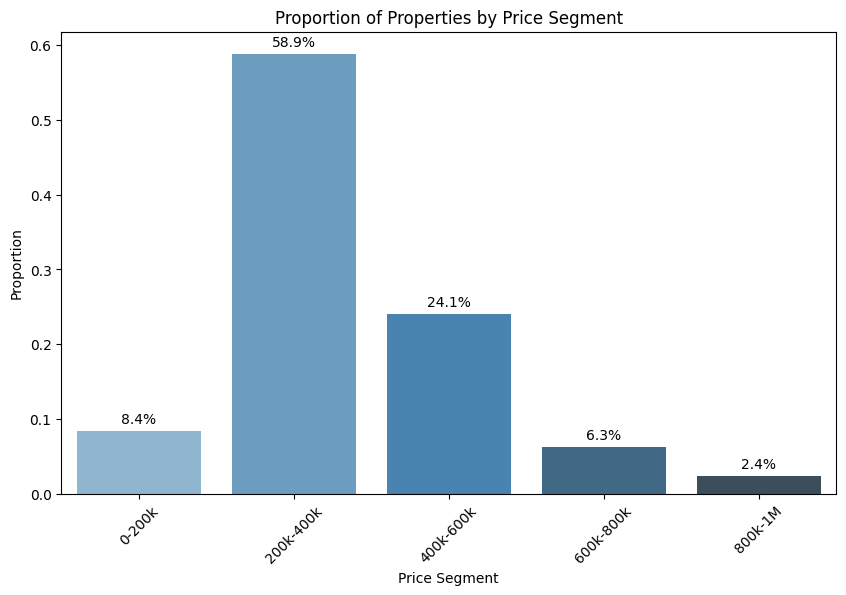

In [88]:
df_below_1m = df_3[df_3['Price'] < 1000000].copy()
df_above_1m = df_3[df_3['Price'] >= 1000000].copy()


# Ensure that 'Price' is in numeric format
df_below_1m['Price'] = pd.to_numeric(df_below_1m['Price'], errors='coerce')

# Define bins and labels for all properties below 1 million Euros
bins_below_1m = [0, 200000, 400000, 600000, 800000, 1000000] #
labels_below_1m = ['0-200k', '200k-400k', '400k-600k', '600k-800k', '800k-1M']

# Create 'Price_Segment' for all properties
df_below_1m['Price_Segment'] = pd.cut(df_below_1m['Price'], bins=bins_below_1m, labels=labels_below_1m, right=False)

# Calculate the proportion of each price segment
price_segment_proportions = df_below_1m['Price_Segment'].value_counts(normalize=True).sort_index()

# Plot the proportions
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=price_segment_proportions.index, y=price_segment_proportions.values, palette="Blues_d")

plt.title('Proportion of Properties by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Proportion')
plt.xticks(rotation=45)  # Rotate labels to improve readability

# Annotate each bar with the percentage value
for bar in bars.patches:
    # The text annotation for each bar should be its height (proportion) formatted as a percentage
    bars.annotate(format(bar.get_height(), '.1%'),  # Format the proportion as a percentage with one decimal place
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position for the text (x, y)
                   ha='center',  # Center the text horizontally
                   va='center',  # Center the text vertically within the bar
                   size=10,  # Font size
                   xytext=(0, 8),  # Position offset for the text (to be slightly above the bar)
                   textcoords='offset points')  # Use offset points for positioning the text

plt.show()

## Proportion of properties by price segment > 1M EUR

/var/folders/5h/_vtcyyv117xbrdwp8624nv_c0000gp/T/ipykernel_88033/879234744.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_above = sns.barplot(x=price_segment_proportions_above.index, y=price_segment_proportions_above.values, palette="Blues_d")


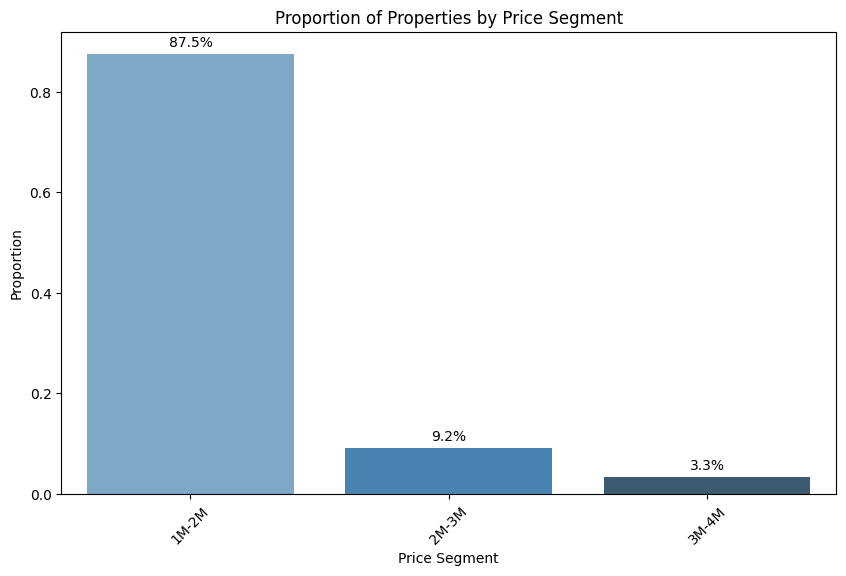

In [89]:
df_above_1m['Price'] = pd.to_numeric(df_above_1m['Price'], errors='coerce')

# Define bins and labels for all properties above 1 million Euros
bins_above_1m = [1000000, 2000000, 3000000, 4000000] #
labels_above_1m = ['1M-2M', '2M-3M', '3M-4M']

# Create 'Price_Segment' for all properties
df_above_1m['Price_Segment'] = pd.cut(df_above_1m['Price'], bins=bins_above_1m, labels=labels_above_1m, right=False)

# Calculate the proportion of each price segment
price_segment_proportions_above = df_above_1m['Price_Segment'].value_counts(normalize=True).sort_index()

# Plot the proportions
plt.figure(figsize=(10, 6))
bars_above = sns.barplot(x=price_segment_proportions_above.index, y=price_segment_proportions_above.values, palette="Blues_d")

plt.title('Proportion of Properties by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Proportion')
plt.xticks(rotation=45)  # Rotate labels to improve readability

# Annotate each bar with the percentage value
for bar in bars_above.patches:
    # The text annotation for each bar should be its height (proportion) formatted as a percentage
    bars_above.annotate(format(bar.get_height(), '.1%'),  # Format the proportion as a percentage with one decimal place
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position for the text (x, y)
                   ha='center',  # Center the text horizontally
                   va='center',  # Center the text vertically within the bar
                   size=10,  # Font size
                   xytext=(0, 8),  # Position offset for the text (to be slightly above the bar)
                   textcoords='offset points')  # Use offset points for positioning the text

plt.show()
